### Microbiology -- plots of weekly averages 2016 - 2017


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import re
from textwrap import wrap
import matplotlib.ticker
import os

idx = pd.IndexSlice

### I herded the cats in a previous note book and exported the usable bits to json.  Here well get a look at it without having to worry about formatting and all the other stuff that takes away from interpreting the data

#### there is still all the importing and checking that has to be done you can skip that and go to block 13.
#### thats where the functions for grouping and graphing start
1. The idea is to get a better look at what we got
2. Figure out the best way to present and interpret
3. Get output that can be used by other apis ---- primarily with json


In [2]:
here = os.getcwd()
j_data = here + '/data/json/'

In [3]:
## open up the dfs
def get_jsons(file_name):
    a = pd.read_json(j_data + file_name, orient='index')
    return a

In [4]:
dfs = ['m_b_2016.json','m_b_2017.json', 'rain_2016.json','m_b_201724.json', 'm_b_201748.json', 'rain_2017.json']

In [5]:
m_b_2016 = get_jsons(dfs[0])
m_b_2017 = get_jsons(dfs[1])
rain_2016 = get_jsons(dfs[2])
m_b_201724 = get_jsons(dfs[3])
m_b_201748 = get_jsons(dfs[4])
rain_2017 = get_jsons(dfs[5])

In [6]:
# check how the tools work in this environment
# not the same function as before, removed index

def get_jsons_x(file_name):
    with open(j_data + file_name, 'r') as f:
        a = json.load(f)
    return a
date_week16 = get_jsons_x('date_week16.json')

In [7]:
week_date16 = get_jsons_x('week_date16.json')
colony_map_16 = get_jsons_x('colony_map_16.json')
three_plate_16 = get_jsons_x('three_plate_16.json')
# so now we need the weekly average per colony, per week, per location
# for that we need to call dates
week_date16 = get_jsons_x('week_date16.json')
date_week16 = get_jsons_x('date_week16.json')
places = get_jsons_x('places.json')
mediums = get_jsons_x('mediums.json')

In [8]:
m_b_2016.set_index(['Date', 'Location'], inplace=True)
m_b_2016.sort_index(axis=0, level='Date', ascending=True, inplace=True)
#m_b_2016[three_plate_16[0][1]][:3]#<----should now be sorted by date

In [9]:
a_color_week = m_b_2016.loc[idx[week_date16['Week one'], places[0]], three_plate_16[0]]#<----- by changing the index numbers change location and colony

In [10]:
# this will give all the values for a color group for the entire project:
# m_b_2016.loc[m_b_2016.Location == places [2], three_plate_16[3]]
a_color_week.apply('mean', axis=1)#<------ gives the average of the row

Date        Location
2016-06-21  MRD         0.666667
dtype: float64

In [11]:
a_color_week.apply('mean', axis=1).item()#<---- gives the number that we need

0.6666666666666666

In [12]:
# so now put this all together to create a list that has weekly average per colony, per week, per location

In [13]:
# iterate through the colonies:
def colony_avg(df, dates, place, plates):
    a = df.loc[idx[dates, place], plates]
    b = df.loc[idx[dates, place], 'P1_qty_sample'].item()
    c = 100/b 
    #print(a)
    d = a.apply('mean', axis=1).item()
    if d == 0:
        d = 1/len(plates)
        f = colony_map_16[plates[0]]
        e = d*c
        return e, f, b
    elif d > 0:
        e =d*c
        f = 'none'
        return e, f, b

In [14]:
# iterate by week
def weekly_avg(df, dates, place, plat_s):
    d = []
    e = []
    for plates in plat_s:
        a, b, c = colony_avg(df, dates, place, plates)
        d.append(a)
        if b != 'none':
            e.append(b)
    f = ', '.join(e)
        
    return [{date_week16[dates]:d}, {'BDL':f}, {'dilution':c}]

In [15]:
# add admin data
def place_weekly_avg(df, dates, place, plat_s):
    #for place in places:
    a = weekly_avg(df, dates, place, plat_s)
    a.append({'num samps':len(plat_s[0])})
    return a


In [16]:
# group by place then week
def place_by_week(df, dates, places, plates):
    d = []
    for place in places:
        b = []
        for date in dates:            
            a= place_weekly_avg(df, date, place, plates)
            #print(a)
            b.append(a)
        #print(place)
        c = {place:b}
        #print(c)
        d.append(c)
    #print(d)
    return d
    
bar_charts = place_by_week(m_b_2016, list(date_week16.keys()), places[:], three_plate_16)
bar_charts[0]['MRD'][0][0]#<--- gives the average colony count per group/week/location---

{'Week one': [66.66666666666666,
  466.6666666666667,
  100.0,
  266.66666666666663,
  33.33333333333333]}

In [17]:
bar_charts[0]['MRD'][0][1]#<--- changing this number gives other data, colony types below detetectable limit

{'BDL': 'other'}

In [18]:
bar_charts[0]['MRD'][0][2]#<----- dilution factor

{'dilution': 1.0}

In [19]:
bar_charts[0]['MRD'][0][3]#<------ how many samples were taken

{'num samps': 3}

In [20]:
# os.listdir(here+ '/data/images')

In [21]:
m_b_201724.set_index(['Date', 'Location'], inplace=True)
m_b_201724.sort_index(axis=0, level='Date', ascending=True, inplace=True)

In [22]:
week_date = get_jsons_x('week_date.json')
date_week = get_jsons_x('date_week.json')
three_p_24_17 = get_jsons_x('three_p_24_17.json')
colony_map = get_jsons_x('colony_map.json')

In [23]:
colony_map_17_24 = {'P1_24h_big_blue': 'big_blue',
                    'P1_fluo_halo_colonies': 'UV Fluo',
                    'P1_24h_med_blue': 'med_blue',
                    'P1_24h_turq': 'turq',
                    'P1_24h_green': 'green',
                    'P1_24h_pink': 'pink',
                    'P1_24h_other': 'other',
                    'P2_24h_big_blue': 'big_blue',
                    'P2_fluo_halo_colonies': 'UV Fluo',
                    'P2_24h_med_blue': 'med_blue',
                    'P2_24h_turq': 'turq',
                    'P2_24h_green': 'green',
                    'P2_24h_pink': 'pink',
                    'P2_24h_other': 'other',
                    'P3_24h_big_blue': 'big_blue',
                    'P3_fluo_halo_colonies': 'UV Fluo',
                    'P3_24h_med_blue': 'med_blue',
                    'P3_24h_turq': 'turq',
                    'P3_24h_green': 'green',
                    'P3_24h_pink': 'pink',
                    'P3_24h_other': 'other'}


In [24]:
def colony_avg_17(df, dates, place, plates):
    a = df.loc[idx[dates, place], plates]
    #print(a)
    b = df.loc[idx[dates, place], 'P1_qty_sample'].item()
    g = df.loc[idx[dates, place], 'Samples'].item()
    c = 100/b 
    #print(a)
    d = a.apply('mean', axis=1).item()
    if g == 0:
        e = 0
        f = 'no sample'
        return e, f, b, g        
    elif d == 0:
        d = 1/len(plates)
        f = colony_map_17_24[plates[0]]
        e = d*c
        return e, f, b, g
    elif d > 0:
        e =d*c
        f = 'none'
        return e, f, b, g

In [25]:
# iterate by week
def weekly_avg_17(df, dates, place, plat_s):
    d = []
    e = []
    for plates in plat_s:
        a, b, c, g = colony_avg_17(df, dates, place, plates)
        d.append(a)
        if b != 'none':
            e.append(b)
    if g == 0:
        f = e[0]
    elif g != 0:
        f = ', '.join(e)
        
    return [{date_week[dates]:d}, {'BDL':f}, {'dilution':c}, {'num samps':g}]

In [26]:
# add admin data
def place_weekly_avg_17(df, dates, place, plat_s):
    #for place in places:
    a = weekly_avg_17(df, dates, place, plat_s)
    
    
    return a


In [27]:
# group by place then week
def place_by_week_17(df, dates, places, plates):
    d = []
    for place in places:
        b = []
        for date in dates:            
            a= place_weekly_avg_17(df, date, place, plates)
            #print(a)
            b.append(a)
        #print(place)
        c = {place:b}
        #print(c)
        d.append(c)
    #print(d)
    return d
    

In [28]:
a_i = m_b_201724.loc[m_b_201724.medium == 'easy_gel'].copy()

In [29]:
a_i.loc[idx['2017-07-24','MRD'], 'Samples'] = 0

In [30]:
bar_chart_17 = place_by_week_17(a_i, list(date_week.keys()), places[:], three_p_24_17)

In [31]:
week_days = list(week_date.keys())

In [32]:
# so to get the average weekly total of all colony foriming units
# I will add up the averages of the individual colors(already calculated to make the average grid)
# and we will grab only the coliforms --- using UV for big_blue

def total_cfu(c, v, q):
    # c = list of the weeks of the study 'Week one', 'Week two' ....
    # v = list of the locations indentified for summary
    # q = the results from the grid layout fundtion
    # place to store the results
    b = {}
    # go through the locations one after another
    for n, x in enumerate(v):
        # place to store interim results
        e = []
        # go through the results of each location, week by week
        for i, w in enumerate(c):
            # q[n][v[n]][i][0][w] translates to
            # four_eight_ave[0][places_48[0][0][0]['Week one']]
            # if this was the first location through the function
            a = q[n][v[n]][i][0][w]
            if type(a) == dict:
                # if there is no value or it is 'bdl'
                # take the average of the current results and append to e
                # uneasonable to think that the result would be zero
                d=np.mean(e)
            else:
                # if the result is anything else sum it up
                # this is the list of results for the bar charts
                d = sum(a)
            # take d and put it in e
            e.append(d)
        # get the standard deviation
        f = np.std(e)
        # make a string to indentify the std
        # this will be component of the error bars
        string = x + '_std'
        # put all of that in a dict so it acan be called in a plotting function
        b.update({x:e, string:f})
    
    return b

In [33]:
t_cfu = total_cfu(week_days, places, bar_charts)

In [34]:
def simple_plot(arange, values, places, xtiks):
    fig, ax = plt.subplots(figsize=(9,5))
    x = np.arange(arange)
    y = values
    for i, n in enumerate(places):
        string = n + '_std'
        std = y[string]
        ratio = std/max(y[n])
        for j, o in enumerate(x):
            ax.errorbar(x[j], y[n][j], yerr=y[n][j]*ratio )
        ax.plot(x, y[n])
        plt.xticks(x, xtiks)
    plt.show()

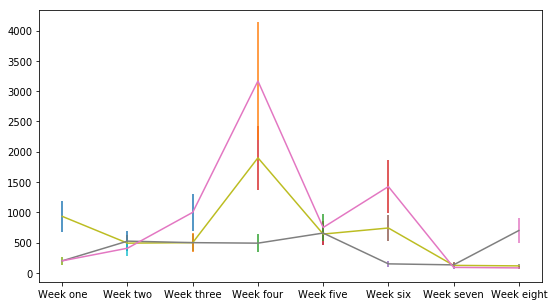

In [35]:
simple_plot(8, t_cfu, places, week_days)

In [36]:
rain_2016.sort_values('Date', inplace=True)
date_list = sorted(list(week_date16.values()))
samp_date = sorted(list(date_week16.keys()))
samp_date = [pd.to_datetime(x) for x in samp_date]


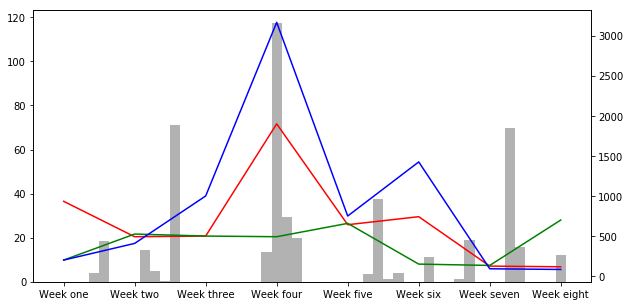

In [37]:
def rain_plot(places, week_days, date_list, rain, cfu, samp_date):
    collss = ['r', 'g', 'b']
    locs = date_list
    labels = week_days
    fig, ax1 = plt.subplots(figsize=(10,5))
    x_one = rain['Date']
    y_one = rain['Rain']
    ax1.bar(x_one, y_one.values*2.54, width=1, color='black', alpha=0.3)
    ax2 = ax1.twinx()
    for i, n in enumerate(places):
        x_two = samp_date
        y_two = cfu[n]
        ax2.plot(x_two, y_two, color=collss[i])

    plt.xticks(locs, labels)   
    plt.show()
rain_plot(places, week_days, date_list, rain_2016, t_cfu, samp_date)

In [38]:
t_cfu17 = total_cfu(week_days, places, bar_chart_17)

In [39]:
rain_2017['Date'] = pd.to_datetime(rain_2017['Date'])
rain_2017.sort_values('Date', inplace=True)
date_list17 = sorted(list(week_date.values()))
samp_date17 = sorted(list(date_week.keys()))
samp_date17 = [pd.to_datetime(x) for x in samp_date17]


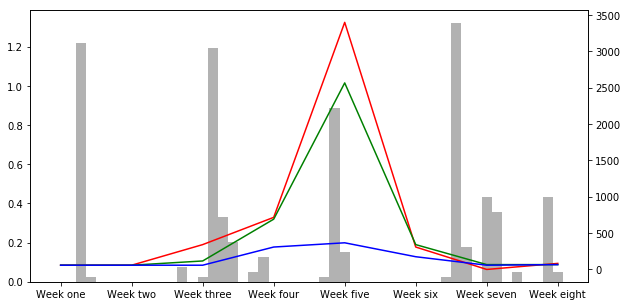

In [40]:
rain_plot(places, week_days, date_list17, rain_2017[7:], t_cfu17, samp_date17)

In [41]:
def not_simple_plot(arange, values, datelist, ticklocs, places,rain, xtiks,sup_title, title, filename):
    collss=['darkred', 'darkslategray', 'teal']
    nticks = 8
    fig, ax2 = plt.subplots(figsize=(10,6), edgecolor='midnightblue')
    x = datelist
    y = values
    locs = ticklocs
    labels = week_days
    x_one = rain['Date']
    y_one = rain['Rain']
    ylim = [1]
    for i, n in enumerate(places):
        string = n + '_std'
        std = y[string]
        ratio = std/max(y[n])
        for j, o in enumerate(x):
            t, c, j = ax2.errorbar(x[j], y[n][j], yerr=y[n][j]*ratio, capsize=2, alpha=0.4, ecolor='magenta',)
            for k in j:
                k.set_linestyle('--')
            for cap in c:
                cap.set_marker("o")
        ax2.plot(x, y[n], label=n, color=collss[i], linewidth=3)
        if max(y[n]) > max(ylim):
            ylim.append(max(y[n]))
        ax2.set_ylim(bottom=0, top=max(ylim)+100)
    ax1 = ax2.twinx() 
    ax1.bar(x_one, y_one.values, width=1, color='b', alpha=0.2, label="cm of rain")
      
    ax1.spines['bottom'].set_color('midnightblue')
    ax1.spines['top'].set_color('midnightblue')
    ax1.spines['left'].set_color('midnightblue')
    ax1.spines['right'].set_color('midnightblue')
    ax1.grid(which='major', color='midnightblue', linestyle='--', alpha=0.2, axis='y')
    ax1.tick_params(axis='both', which='both', color='midnightblue')
    ax1.set_ylabel('Centimeters of rain per day', labelpad=10, fontsize=14)
    #ax1.set_ylim(top=max(ylim))
    
    ax2.set_ylabel('Colony forming units per 100mL', labelpad=10, fontsize=14)
    fig.legend( loc=(0.74, 0.55), frameon=True, fontsize=12, edgecolor='midnightblue', framealpha=0.8 )
    
    #plt.ylim(ymax=max(ylim))    
    plt.xticks(locs, labels, fontsize=11, )
    plt.suptitle(sup_title, fontsize=16, family='sans')
    plt.title(title, fontsize=16, family='sans', y=1.03)
    plt.subplots_adjust(top=0.85)
    plt.savefig(filename)
    
    
    plt.show()

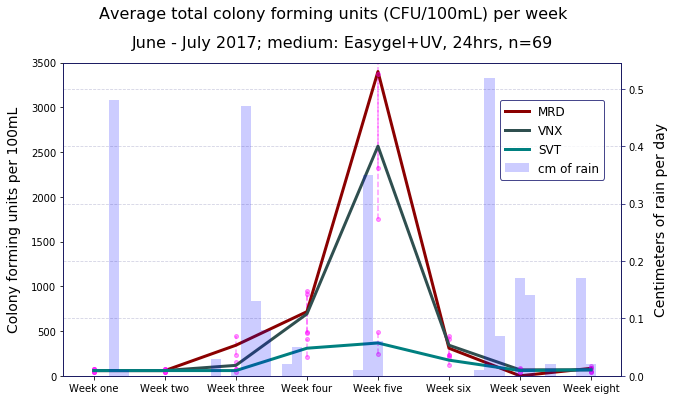

In [42]:
not_simple_plot(8, t_cfu17,samp_date17,  date_list17, places,rain_2017[7:], week_days, 'Average total colony forming units (CFU/100mL) per week', 'June - July 2017; medium: Easygel+UV, 24hrs, n=69', 'cfu_week.png')

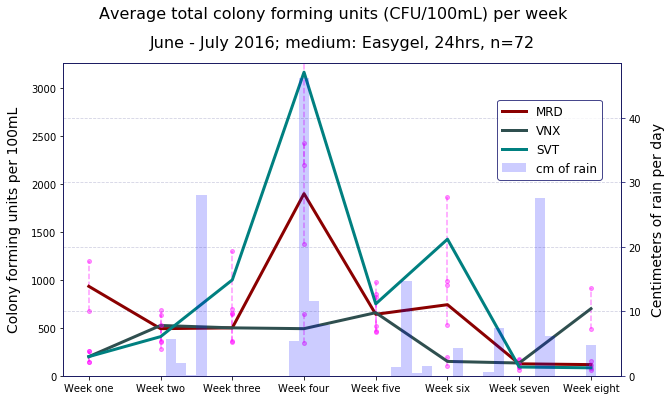

In [43]:
not_simple_plot(8, t_cfu,samp_date,  date_list, places,rain_2016[7:], week_days, 'Average total colony forming units (CFU/100mL) per week', 'June - July 2016; medium: Easygel, 24hrs, n=72', 'cfu_week_16.png')

In [44]:
def total_ecoli_16(c, v, q):
    b = {}
    for n, x in enumerate(v):
        e = []
        for i, w in enumerate(c):        
            if type(q[n][v[n]][i][0][w]) == list:
                a = q[n][v[n]][i][0][w][:1]#<---- changed
                
                d = np.mean(a)
                
            elif type(q[n][v[n]][i][0][w]) == dict:
                d=np.mean(e)
            e.append(d)
        f = np.std(e)
        string = x + '_std'
        b.update({x:e, string:f})
        #print(b)
    
    return b

In [45]:
total_big_blue_16 = total_ecoli_16(week_days,places, bar_charts,)

In [46]:
# will have to modify the fucntion a little to grab the 1st (uv) and 3rd element of the list
# something like this:
# four_eight_ave[2]['SVT'][3][0][weeks_l[3]][0:3:2]
# [0:3:2] <-- this last bit means from items 0:3 grab every other item (not including 3)
# and we have to account for the fact that whate ever is coming down may not be a list
def total_big_blue_17(c, v, q):
    b = {}
    for n, x in enumerate(v):
        e = []
        for i, w in enumerate(c):        
            if type(q[n][v[n]][i][0][w]) == list:
                a = q[n][v[n]][i][0][w][1]#<---- changed
                print(a)
                d = np.sum(a)
            elif type(q[n][v[n]][i][0][w]) == dict:
                d=np.mean(e)
            e.append(d)
        f = np.std(e)
        string = x + '_std'
        b.update({x:e, string:f})
        #print(b)
    
    return b

In [47]:
total_big_blue17 = total_big_blue_17(week_days, places, bar_chart_17)

8.333333333333332
8.333333333333332
50.0
258.33333333333337
233.33333333333334
8.333333333333332
0
8.333333333333332
8.333333333333332
8.333333333333332
33.33333333333333
266.66666666666663
33.33333333333333
8.333333333333332
8.333333333333332
8.333333333333332
8.333333333333332
8.333333333333332
8.333333333333332
91.66666666666666
33.33333333333333
8.333333333333332
8.333333333333332
8.333333333333332


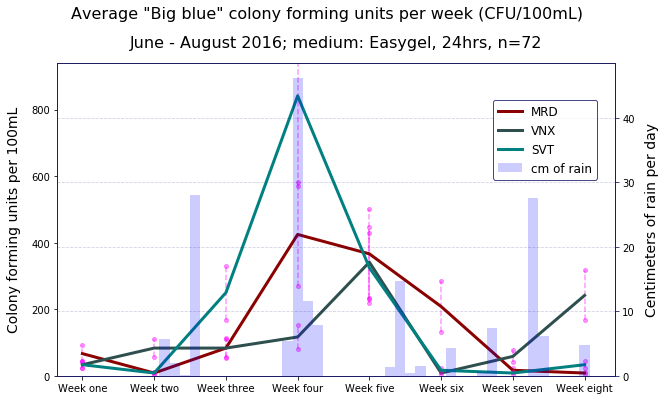

In [48]:
not_simple_plot(8, total_big_blue_16,samp_date,  date_list, places,rain_2016[7:], week_days, 'Average "Big blue" colony forming units per week (CFU/100mL)','June - August 2016; medium: Easygel, 24hrs, n=72', 'data/images/tot_cfu_16.png')

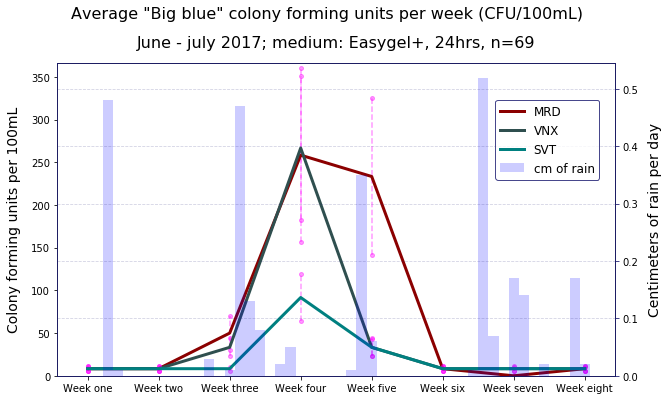

In [49]:
not_simple_plot(8, total_big_blue17,samp_date17,  date_list17, places,rain_2017[7:], week_days,'Average "Big blue" colony forming units per week (CFU/100mL)','June - july 2017; medium: Easygel+, 24hrs, n=69', 'data/images/tot_bblu_17.png')

In [50]:
def total_uv_17(c, v, q):
    b = {}
    for n, x in enumerate(v):
        e = []
        for i, w in enumerate(c):        
            if type(q[n][v[n]][i][0][w]) == list:
                a = q[n][v[n]][i][0][w][0]#<---- changed
                #print(a)
                d = np.sum(a)
            elif type(q[n][v[n]][i][0][w]) == dict:
                d=np.mean(e)
            e.append(d)
        f = np.std(e)
        string = x + '_std'
        b.update({x:e, string:f})
        #print(b)
    
    return b

In [51]:
total_uv17 = total_uv_17(week_days, places, bar_chart_17)

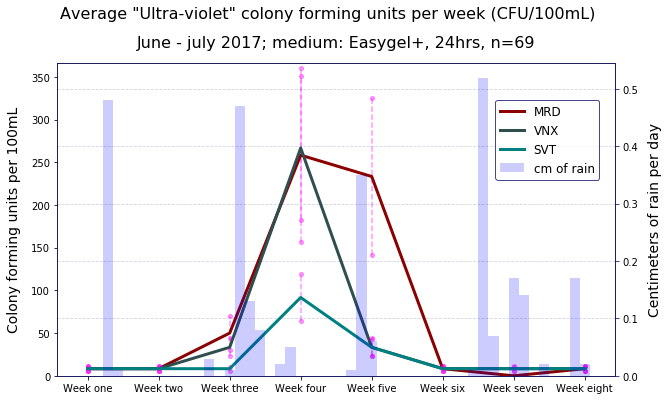

In [52]:
not_simple_plot(8, total_big_blue17,samp_date17,  date_list17, places,rain_2017[7:], week_days,'Average "Ultra-violet" colony forming units per week (CFU/100mL)','June - july 2017; medium: Easygel+, 24hrs, n=69', 'data/images/tot_uv_17.png')

In [53]:
# ok, here is the simple list for your efforts, as possible:
# chart for



# Fig 4A summary figure with both 2016 big blues and 2017 uv+ somehow overlapped with the jazz interval marked
# (this will do electronically)
# Fig 4B same as above, but with total cfus
# Fig 4C to show river UV+ vs sampling sites UV+ ------ maybe later? 
# Fig 4D stats representation of your choice!  (not normal distributions? or??)
# Finally, nice on-line data link with playing and uploading possibilities (like for SLR)…

# ok?  too much??  maybe we already have 2A and 2B
# I can move the sampling site circle for MRD on the fig 1B I think no probs…

# For the scav - of course, no response yet, even with my second note (that gave an auto response, at least).
# Still, they got are request, and will definitely be one of the places we will send the ‘clean draft’ to - after our collaborators comments and prior to submission…
# n’est-ce pas?  (we need a list of all the good addressed to send this to - Montreux folk also, and our Clarens STEP friends)

# will miss you tomorrow (you can change your mind still! ;)
# a+
# Rachel